In [1]:
import pandas as pd
import numpy as np
import scipy.ndimage as sp
import cv2
import matplotlib.pyplot as plt

In [2]:
#Problem 1
def gradient_magnitude(image):
    kernel1 = np.array([
        [0, 0, 0], 
        [-1, 1, 0], 
        [0, 0, 0]])
    kernel2 = np.array([
        [0, -1, 0],
        [0, 1, 0],
        [0, 0, 0]])
    gradx = cv2.filter2D(image, -1, kernel1)
    grady = cv2.filter2D(image, -1, kernel2)
    return gradx+grady

    

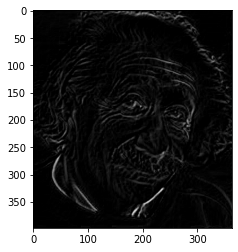

In [3]:
image = cv2.imread("Image1.png", 0)
grad = gradient_magnitude(image)
plt.imshow(grad, cmap="gray")

In [4]:
#Problem 2
def laplacian_(image):
    kernel = np.array([
        [0, -1, 0],
        [-1, 4,-1],
        [0, -1, 0]])
    lap = cv2.filter2D(image, -1, kernel)
    return lap
    

[[ 0  1  0 ...  0  0  2]
 [ 2  0  0 ...  1  0  2]
 [ 0  0  1 ...  0  1  0]
 ...
 [16 11 15 ... 33 27 11]
 [10 12  8 ...  0  3  0]
 [ 0  0  0 ...  0  0  0]]


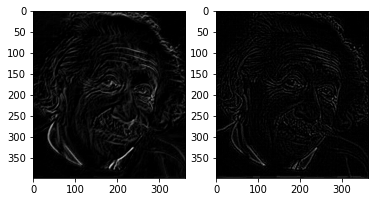

In [5]:
fig, ax = plt.subplots(1, 2)
image = cv2.imread("Image1.png", 0)
ax[0].imshow(gradient_magnitude(image), cmap="gray")
print(laplacian_(image))
ax[1].imshow(laplacian_(image), cmap="gray")

In [13]:
#Problem 3
#Zero crossings occur when the sign changes in an image
def zero_crossing(image):
    image = image / 255
    signs = np.sign(image)
    rows, cols = signs.shape
    out = np.zeros((image.shape))
    for i in range(rows-3):
        for j in range(cols-3):
            mid = signs[i+1, j+1]
            if signs[i, j+1] != mid and signs[i+1, j] != mid and signs[i+1, j+2] != mid and signs[i+2, j+1] != mid:
                continue
                
            out[i, j] = 1
    return out
    
    
            
    

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


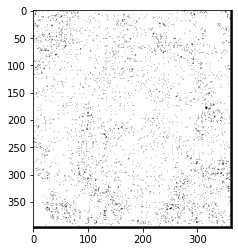

In [14]:
zrc = zero_crossing(laplacian_(image))
print(zrc)
plt.imshow(zrc, cmap="gray")